# Demonstration of Artificial Neural Netowrks

Parts of the code are based on a similar demonstration written by Ahmet Sacan
in MATLAB.

In [1]:
# Imports for data manipulation
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from infoml import datasets

# Imports for ML
from tensorflow.keras.callbacks import TensorBoard
from keras.utils.vis_utils import plot_model
from tensorflow.keras import layers
from tensorflow import keras
from sklearn.neural_network import MLPClassifier
import tensorflow as tf

#See bmes.ahmet/README.TXT for setting up BMESAHMETDIR environment variable.
import sys,os; sys.path.append(os.environ['BMESAHMETDIR']); import bmes

# Set seed for reproducibility
np.random.seed(0)
tf.random.set_seed(0)

2023-02-26 19:18:39.747298: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-26 19:18:42.003411: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-02-26 19:18:44.208764: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/x86_64-linux-gnu:/usr/lib/x86_64-linux-gnu:/home/muaddib/.conda/envs/keras/lib/
2023-02-26 19:18:44.209783: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 

## [Keras] Simple Classification Example

For a classification problem, you need to make sure you are using a network
designed for classification tasks and you either get outputs that are already
binary, or that you can interpret as binary.

In [93]:
# Set up sample data for the AND problem (truth table)
XT = np.array([[0, 0, 0], [1, 0, 0], [0, 1, 0], [1, 1, 1]])

# Set up sample data for the XOR problem (truth table)
XT = np.array([[0, 0, 0], [1, 0, 1], [0, 1, 1], [1, 1, 0]])

# Larder data set for XOR
XT = np.array([[0, 0, 0], [1, 0, 1], [0, 1, 1], [1, 1, 0], 
               [0, 0, 0], [1, 0, 1], [0, 1, 1], [1, 1, 0]])

# Define data and labels
X = XT[:, :-1]
y = XT[:, -1].reshape(-1, 1)

In [103]:
# Create the network and configure the options
net = keras.Sequential()
net.add( layers.Dense(units=1, input_dim=X.shape[1], activation='sigmoid') )

# Do not use validation and test sets
net.compile(loss='binary_crossentropy', metrics=['accuracy'])

# Train the network
history = net.fit(X, y, epochs=100, verbose=0);

# Visualize the network
plot_model(net, show_shapes=True, show_layer_names=True, to_file='model.png')

1/1 [==============================] - 0s 54ms/step
Accuracy:  0.75


#### Test Network Performance

Here, I am just calculating the "training" performance. For a proper evaluation, 
you would need to report performance on a separate "test" set and/or perform 
cross-validation.

1/1 [==============================] - 0s 44ms/step
Accuracy:  0.75


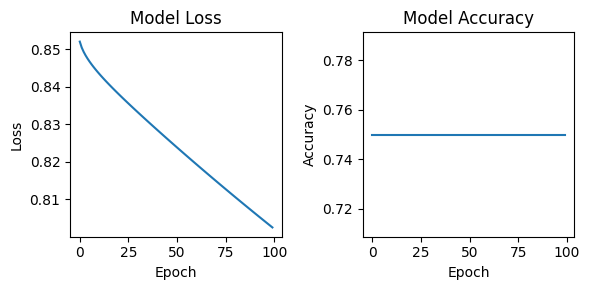

In [104]:
# Evaluate "training" performance
yhat = net.predict(X)

# You need to examine target and network output values to make sure you are
# comparing them correctly. Here, targets are 0 or 1; and the network
# output is a continuous value between 0 and 1. I am thresholding network's
# output Y, to convert it to 0 or 1 and use that as a classification decision.
yhat = (yhat > 0.5).astype(int)

# Calculate the accuracy
acc = np.mean(yhat == y)
print('Accuracy: ', acc)

# Plot training loss and accuracy over time
fig, ax = plt.subplots(1, 2, figsize=(6,3))
ax[0].plot(history.history['loss'])
ax[0].set_title('Model Loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch');
ax[1].plot(history.history['accuracy'])
ax[1].set_title('Model Accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch');
plt.tight_layout()

## [sklearn] Simple Classification Example

For a classification problem, you need to make sure you are using a network
designed for classification tasks and you either get outputs that are already
binary, or that you can interpret as binary.

In [105]:
mlp = MLPClassifier(hidden_layer_sizes=(1,), activation='logistic', max_iter=1000)
mlp.fit(X, y.ravel())

# Evaluate "training" performance
yhat = mlp.predict(X)

# Calculate the accuracy
acc = mlp.score(X, y)
print('Accuracy: ', acc)

# Classification report
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y,yhat))
print(classification_report(y,yhat))

Accuracy:  0.5
[[4 0]
 [4 0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         4
           1       0.00      0.00      0.00         4

    accuracy                           0.50         8
   macro avg       0.25      0.50      0.33         8
weighted avg       0.25      0.50      0.33         8



/home/muaddib/.conda/envs/keras/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/muaddib/.conda/envs/keras/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/muaddib/.conda/envs/keras/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Neural Network Regression

For a regression problem, you need to make sure you are using a network
designed to produce real-valued outputs.

### Setup the data for house dataset

The *house dataset* contains information about 506 real estate properties,
and their relative valuation.

In [4]:
# Load the dataset
X, y, labs = datasets.load_boston()

#### Only one fold cross-validation

I will use only the first "fold". For a proper implementation, you need to repeat the training & evaluation on all folds and report the averaage performance on these test sets.

In [5]:
from sklearn.model_selection import KFold

In [12]:
# Set up the cross-validation
kf = KFold(n_splits=4, shuffle=True, random_state=0)

# Keep only the first fold
train_idx, test_idx = next(kf.split(X))
X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

# Define the neural network
net = keras.Sequential()
net.add( layers.Dense(units=1, input_dim=X.shape[1], activation='linear') )

# Do not use validation and test sets
net.compile(loss='mse', metrics=['mse'], optimizer='adam')

# Train the network
history = net.fit(X_train, y_train, epochs=100, verbose=0);

# Evaluate "training" performance
mse = net.evaluate(X_test, y_test, verbose=0)
print('MSE: ', mse)
print('RMSE: ', np.sqrt(mse))

MSE:  [93.65806579589844, 93.65806579589844]
RMSE:  [9.67770974 9.67770974]


In [13]:
Ypred = net.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [19]:
np.stack((Ypred[:5], y_test[:5].reshape(-1,1)), axis=1)

array([[[29.20764732],
        [21.6       ]],

       [[24.32217979],
        [22.9       ]],

       [[29.14893341],
        [27.1       ]],

       [[25.29543304],
        [16.5       ]],

       [[27.83885384],
        [15.        ]]])

#### [sklearn] Only one fold cross-validation

I will use only the first "fold". For a proper implementation, you need to repeat the training & evaluation on all folds and report the averaage performance on these test sets.

In [ ]:
## Prepare Training & Test Sets.
# I am generating Training & Test sets for only 1 of the folds. In your applications, you would need to run for all folds.

# For k-fold separation (e.g., k=4):
# For classification problems, use StratifiedKFold; for regression problems use KFold.
from sklearn.model_selection import KFold

kf = KFold(n_splits=4)
Itrain,Itest = next(kf.split(X,Y)) #and obtain the first training & test set
Xtrain = X[Itrain,:]
Ttrain = T[Itrain]
Xtest = X[Itest, :]
Ttest = T[Itest]
#...

# to use skf in a for loop, you can use:
# for Itrain, Itest in skf.split(X,T):
#   ...

In [32]:
# Use MLPClassifier for classification and MLPRegressor for regression.
from sklearn.neural_network import MLPRegressor

# Create the network, set its parameters, train and predict:
# e.g., with 1 hidden unit:
mlp = MLPRegressor(hidden_layer_sizes=(1,), activation='identity')
mlp.fit(X_train, y_train)

Y_pred = mlp.predict(X_test)
print(np.stack((Y_pred[0:5],y_test[0:5]),axis=1) ) #just printing the first few predictions...

[[15.84603792 21.6       ]
 [-2.8027831  22.9       ]
 [ 5.89114718 27.1       ]
 [ 7.99055907 16.5       ]
 [ 5.70189429 15.        ]]


/home/muaddib/.conda/envs/keras/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [37]:
# you can let the mlp do the score calculation:
print('Test set R^2 (proportion of variance) score: ' + str( mlp.score(X_test,y_test) ) )

# or calculate R^2 yourself:
from sklearn.metrics import r2_score
r2_score(y_test,Y_pred)

Test set R^2 (proportion of variance) score: -37.59454599548945


-37.59454599548945